In [1]:
from pathlib import Path
from metadata import ImageDataset, patient
import utils
import numpy as np
import pandas as pd

In [2]:
notebooks_path = Path.cwd()
repo_path = notebooks_path.parent
print(f'The current directory is: {notebooks_path}')

The current directory is: /home/ricardino/Documents/MAIA/tercer_semestre/MISA/final_project/MISA_FINAL_PROJECT/notebooks


# MAIN

In [4]:
#we will compute the boxplot for the following models
model_list = ['TModel_dice_Validation', 'most_similar_dice', 'maxMean_dice', 'weighted_labels_dice']
#we first concatenate all the csv files in a single dataframe
general_df = None
for model in model_list:
    #read csv file
    df = pd.read_csv(repo_path /'data' / 'results' / f'{model}.csv')
    #drop all columns except id_val and the tissue
    df = df.drop(columns=[col for col in df.columns if col not in ['id_val', 'CSF', 'GM', 'WM']])
    #we add a column with the model name
    df['model'] = model
    #concatenate df in general_df
    general_df = pd.concat([general_df, df], axis=0)

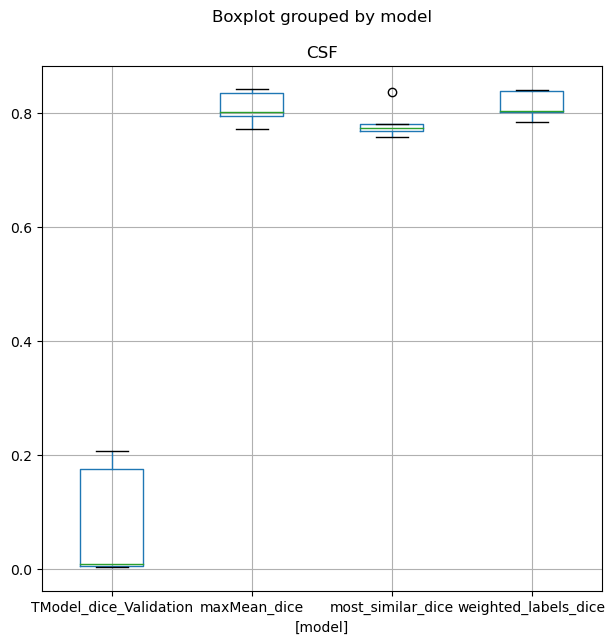

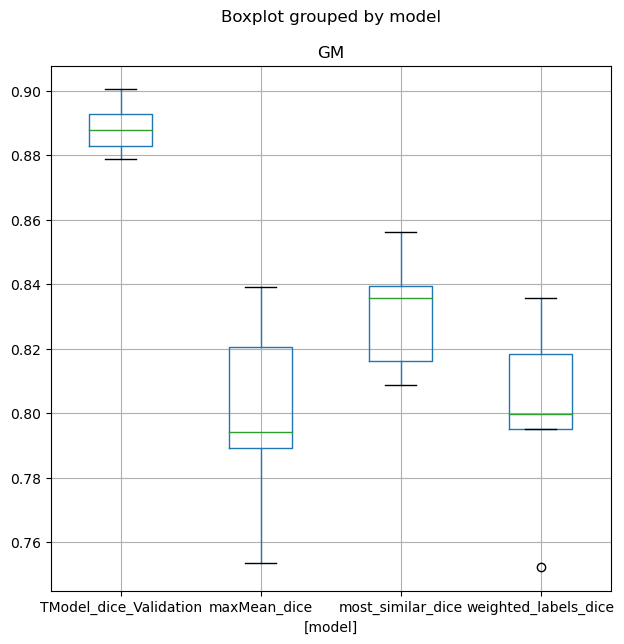

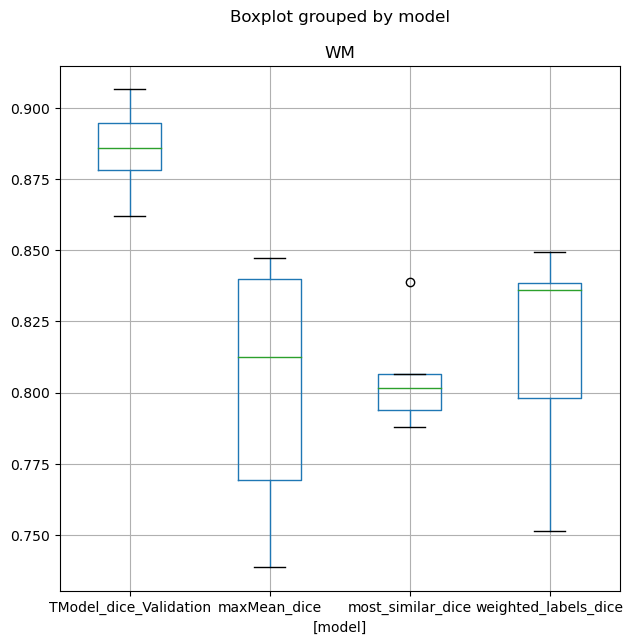

In [6]:
#we now compute the boxplot for each tissue
for tissue in ['CSF', 'GM', 'WM']:
    #we select the tissue
    df_tissue = general_df[[tissue, 'model']]
    #now we compute the boxplot
    df_tissue.boxplot(by='model', figsize=(7, 7))